<a href="https://colab.research.google.com/github/sandeepss2020/Cyber_security/blob/main/CYBER_SECURITY_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from imblearn.combine import SMOTEENN

In [2]:
Le = LabelEncoder()

In [3]:
cyber_data = pd.read_csv('merged_track_b_learn.csv')
print("Number of Observations in Cyber dataset:", cyber_data.shape)
cyber_data.head()

Number of Observations in Cyber dataset: (50000, 11)


,Unnamed: 0,idx,s_ip,s_port,d_ip,d_port,protocol,payload,risk,payload_LE,label
0,0,0,210.248.110.200,47760,144.82.144.26,42718,TCP,......(,2,239,4_unknown
1,1,1,172.116.62.150,47760,38.29.1.69,39548,TCP,......(,2,239,4_unknown
2,2,2,15.164.135.69,60390,37.154.75.207,80,TCP,GET /?id=-9865%27%29%20UNION%20ALL%20SELECT%20...,1,6143,2_exploit
3,3,3,84.12.150.116,47760,64.89.252.59,37816,TCP,......(,2,239,4_unknown
4,4,4,95.42.196.145,53040,17.75.195.163,80,TCP( 6 ),GET /cgi_wrapper HTTP/1.1\r\nReferer: () { _; ...,1,9392,2_exploit


In [4]:
cyber_data = cyber_data.drop(columns=['Unnamed: 0','idx'],axis=1)

In [5]:
cyber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   s_ip        50000 non-null  object
 1   s_port      50000 non-null  int64 
 2   d_ip        50000 non-null  object
 3   d_port      50000 non-null  int64 
 4   protocol    50000 non-null  object
 5   payload     49974 non-null  object
 6   risk        50000 non-null  int64 
 7   payload_LE  50000 non-null  int64 
 8   label       50000 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.4+ MB


In [6]:
cyber_data.describe()

,s_port,d_port,risk,payload_LE
count,50000.000000,50000.000000,50000.00000,50000.00000
mean,36739.119080,25438.775900,1.74906,6254.52076
std,19807.334189,23460.344102,0.64254,5867.15090
min,68.000000,22.000000,1.00000,0.00000
25%,27255.500000,80.000000,1.00000,239.00000
50%,47760.000000,34107.000000,2.00000,5226.50000
75%,48673.500000,48258.000000,2.00000,12094.25000
max,65476.000000,60998.000000,3.00000,16127.00000


In [7]:
cat_col = cyber_data.dtypes[cyber_data.dtypes == "object"]
num_col = cyber_data.dtypes[cyber_data.dtypes != "object"]
#Categorical
print(cat_col)
#Numerical
print(num_col)

s_ip        object
d_ip        object
protocol    object
payload     object
label       object
dtype: object
s_port        int64
d_port        int64
risk          int64
payload_LE    int64
dtype: object


In [8]:
cyber_data.isnull().sum()

s_ip           0
s_port         0
d_ip           0
d_port         0
protocol       0
payload       26
risk           0
payload_LE     0
label          0
dtype: int64

In [9]:
cyber_data['payload'].fillna(0, inplace = True)

In [10]:
cyber_data.isnull().sum()

s_ip          0
s_port        0
d_ip          0
d_port        0
protocol      0
payload       0
risk          0
payload_LE    0
label         0
dtype: int64

In [11]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= cyber_data[col].value_counts()
    percent = cyber_data[col].value_counts() / cyber_data.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')

--------------------S_Ip-------------------------
                 total  percent
176.245.42.111       2  0.00004
76.142.132.139       2  0.00004
210.248.110.200      1  0.00002
114.68.8.81          1  0.00002
219.210.181.240      1  0.00002
...                ...      ...
79.47.119.170        1  0.00002
142.215.174.2        1  0.00002
206.136.40.227       1  0.00002
211.126.163.217      1  0.00002
113.192.4.211        1  0.00002

[49998 rows x 2 columns]


--------------------D_Ip-------------------------
                total  percent
61.246.2.210        2  0.00004
144.82.144.26       1  0.00002
50.54.50.248        1  0.00002
153.250.66.166      1  0.00002
71.223.88.77        1  0.00002
...               ...      ...
70.14.234.118       1  0.00002
64.240.6.187        1  0.00002
40.156.106.17       1  0.00002
153.34.143.130      1  0.00002
95.42.130.186       1  0.00002

[49999 rows x 2 columns]


--------------------Protocol-------------------------
           total  percent
TCP     

In [12]:
cyber_data['payload'].nunique()



16128

In [13]:
from pyparsing import replace_with
unknown_payload = ['......(','.........4......... ','.........4......... ','.........4.........']

#Replace
cyber_data['payload'].replace(to_replace = unknown_payload, value = 'un_payload' , inplace = True)


cyber_data['payload'].value_counts()

un_payload                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [14]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= cyber_data[col].value_counts()
    percent = cyber_data[col].value_counts() / cyber_data.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')

--------------------S_Ip-------------------------
                 total  percent
176.245.42.111       2  0.00004
76.142.132.139       2  0.00004
210.248.110.200      1  0.00002
114.68.8.81          1  0.00002
219.210.181.240      1  0.00002
...                ...      ...
79.47.119.170        1  0.00002
142.215.174.2        1  0.00002
206.136.40.227       1  0.00002
211.126.163.217      1  0.00002
113.192.4.211        1  0.00002

[49998 rows x 2 columns]


--------------------D_Ip-------------------------
                total  percent
61.246.2.210        2  0.00004
144.82.144.26       1  0.00002
50.54.50.248        1  0.00002
153.250.66.166      1  0.00002
71.223.88.77        1  0.00002
...               ...      ...
70.14.234.118       1  0.00002
64.240.6.187        1  0.00002
40.156.106.17       1  0.00002
153.34.143.130      1  0.00002
95.42.130.186       1  0.00002

[49999 rows x 2 columns]


--------------------Protocol-------------------------
           total  percent
TCP     

In [15]:
source_ip = cyber_data['s_ip'].nunique()
destination_ip = cyber_data['d_ip'].nunique()
source_port = cyber_data['s_port'].nunique()
dest_port = cyber_data['d_port'].nunique()


print(f'unique s_ip: {source_ip}, Unique Dest_ip: {destination_ip}, Source_Port: {source_port}, Destination_port: {dest_port}')

unique s_ip: 49998, Unique Dest_ip: 49999, Source_Port: 9176, Destination_port: 13067


In [16]:
# cyber_data.info()

In [17]:
cyber_data = cyber_data.drop(columns=['s_ip','d_ip'],axis=1)


In [18]:
cyber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   s_port      50000 non-null  int64 
 1   d_port      50000 non-null  int64 
 2   protocol    50000 non-null  object
 3   payload     50000 non-null  object
 4   risk        50000 non-null  int64 
 5   payload_LE  50000 non-null  int64 
 6   label       50000 non-null  object
dtypes: int64(4), object(3)
memory usage: 2.7+ MB


In [19]:
cyber_data['label'].value_counts()

2_exploit           19690
4_unknown           16089
3_post              11718
1_reconnaissance     2503
Name: label, dtype: int64

In [20]:
cyber_data['protocol'].value_counts()

TCP          25288
TCP( 6 )     24656
UDP( 17 )       52
UDP              4
Name: protocol, dtype: int64

In [21]:
cyber_data['payload'].value_counts()

un_payload                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [22]:
# xtra = []
# for i in cyber_data['payload']:

#   # cyber_data['payload'] = Le.fit_transform(cyber_data['payload'])

In [23]:
cyber_data['label'] = Le.fit_transform(cyber_data['label'])
cyber_data['protocol'] = Le.fit_transform(cyber_data['protocol'])
# cyber_data['payload'] = Le.fit_transform(cyber_data['payload'])



In [24]:
cyber_data['label'].value_counts()


1    19690
3    16089
2    11718
0     2503
Name: label, dtype: int64

In [25]:
cyber_data['protocol'].value_counts()

0    25288
1    24656
3       52
2        4
Name: protocol, dtype: int64

In [26]:
cyber_data['risk'].value_counts()

2    26209
1    18169
3     5622
Name: risk, dtype: int64

In [27]:
cyber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   s_port      50000 non-null  int64 
 1   d_port      50000 non-null  int64 
 2   protocol    50000 non-null  int64 
 3   payload     50000 non-null  object
 4   risk        50000 non-null  int64 
 5   payload_LE  50000 non-null  int64 
 6   label       50000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 2.7+ MB


In [28]:
feature_cols = ['s_port', 'd_port', 'protocol','payload_LE']
X = cyber_data[feature_cols] # Features
y = cyber_data.label # Target variable

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [30]:
# print(X_train)
# print(y_train)

Logistic Regression

In [31]:
# logreg = LogisticRegression(random_state=16)
# logreg.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)
# print(y_test)
# print("Predicted")
# print(y_pred)

In [32]:
# cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# cnf_matrix

# from sklearn.metrics import classification_report
# # target_names = ['0', '1']
# print(classification_report(y_test, y_pred))

In [33]:
# from sklearn.metrics import accuracy_score

In [34]:
# predictions= logreg.predict(X_test)
# ac = accuracy_score(y_test,predictions)
# print(ac)

In [35]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# logreg = LogisticRegression(random_state=16)
# logreg.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)
# print(y_test)
# print("Predicted")
# print(y_pred)

# cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# cnf_matrix

# from sklearn.metrics import classification_report
# # target_names = ['0', '1']
# print(classification_report(y_test, y_pred))

# predictions= logreg.predict(X_test)
# ac = accuracy_score(y_test,predictions)
# print(ac)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

KNN MODEL By elbow method

In [37]:
clf = KNeighborsClassifier(n_neighbors=3)
# clf.fit(features, label)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.98272

In [38]:
print(y_test)
y_predict = clf.predict(X_test)
print(y_predict)

26247    2
35067    1
34590    3
16668    1
12196    2
        ..
42763    3
26781    1
28306    3
7425     1
45705    3
Name: label, Length: 12500, dtype: int64
[2 1 3 ... 3 1 3]


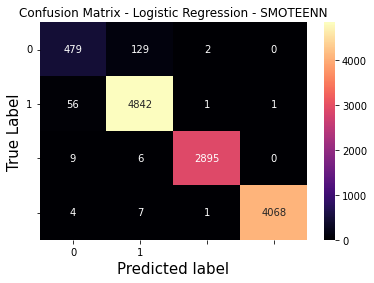

In [39]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix
matrix_df = pd.DataFrame(cnf_matrix)

ax = plt.axes()
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Logistic Regression - SMOTEENN')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['0', '1'])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(['0', '1'], rotation = 0)
plt.show()

In [40]:
cyber_data = cyber_data.drop(columns=['payload'],axis=1)

In [41]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cyber_data)
    distortions.append(kmeanModel.inertia_)

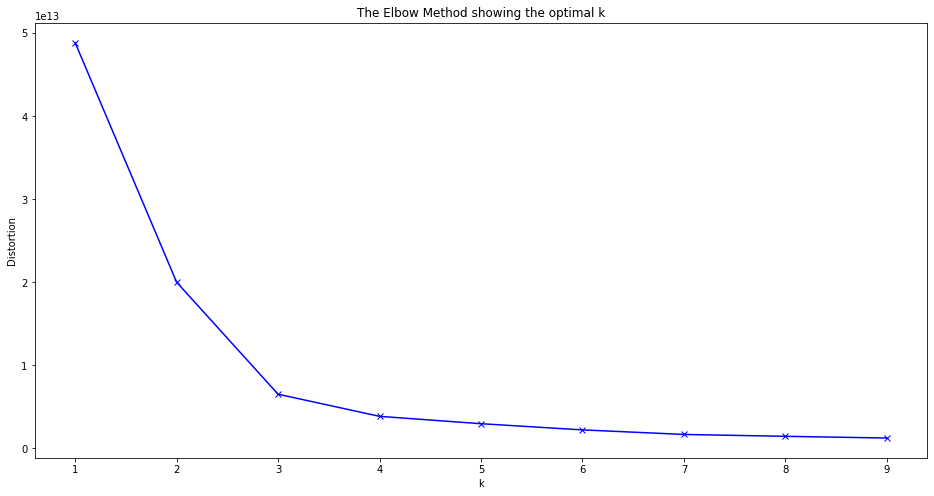

In [42]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [43]:
clf = KNeighborsClassifier(n_neighbors=2)
# clf.fit(features, label)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.98144

Silhouette Method

In [44]:
scaler = StandardScaler()     # Scaling the data so that all the features become comparable
X_scaled = scaler.fit_transform(X)
 
X_normalized = normalize(X_scaled)
 
X_normalized = pd.DataFrame(X_normalized)

Text(0.5, 1.0, 'Visualising the data')

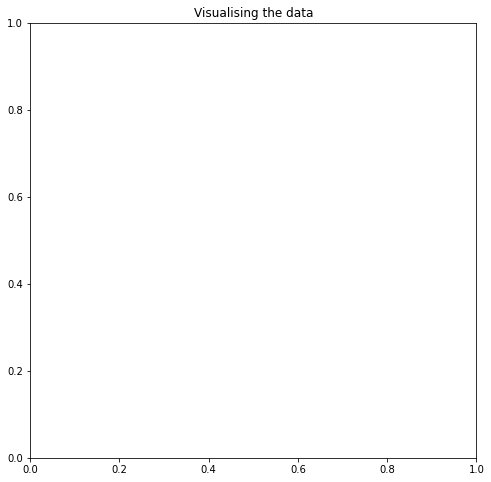

In [45]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
# Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 2)
ac3 = AgglomerativeClustering(n_clusters = 3)
ac4 = AgglomerativeClustering(n_clusters = 4)
ac5 = AgglomerativeClustering(n_clusters = 5)
ac6 = AgglomerativeClustering(n_clusters = 6)
k = [2, 3, 4, 5, 6]
 
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
 
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [ ]:
from typing import Tuple
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def show_correlation_graph(cyber_data: pd.DataFrame, figsize: Tuple):
    plt.figure(figsize=figsize)
    corrmat = cyber_data.corr()
    top_corr_features = corrmat.index
    sns.heatmap(cyber_data[top_corr_features].corr(), annot=True, cmap="RdYlGn")
    plt.show()

show_correlation_graph(df,(10,10))